<a href="https://colab.research.google.com/github/hussnain-imtiaz/Dog-Breed-Identification-Deep-Learning/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Identification using Transfer Learning
This is a multiclass (120 classes) Classification project which identify the breed of a dog using its picture.


## Problem Definintion:
Given the picture of a dog, we have to identify the breed of dog.
  


##  Data:
Orignal Data set came from kaggle "dog breed identification competition".  
More about data can be found here.  

## Evaluation:
Submissions are evaluated on Multi Class Log Loss between the predicted probability and the observed target.

## Data Features:
As its an unstructured data so it may has thousand of features. Well, it's a multiclass problem which contains (120 dog types/classes).

## Getting Data Ready:

In [0]:
#deep learning libraries
import tensorflow as tf
import tensorflow_hub as hub

#regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [212]:
## checking the GPU
def check_GPU():
  if tf.config.list_physical_devices("GPU"):
    print("GPU is enabled.")
  else:
    print("GPU is disabled.")
check_GPU()

GPU is enabled.


Lets import our data and make preprocessing pipeline.

In [0]:
data=pd.read_csv("drive/My Drive/dog vision/labels.csv")

In [214]:
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Now we have to take the `breed` in labels array and use `id` for making file paths to read images.

In [0]:
labels=data["breed"].to_numpy()

In [216]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

As our model only takes numerical data so we have to convert breed into that.

In [0]:
all_breeds=np.unique(labels)

In [218]:
len(all_breeds)

120

In [0]:
labels=[label==all_breeds for label in labels]

In [220]:
labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

Its in numerical form now...   
Let's procedd to the images preprocessing.  
We have to read all of them and then preprocess them.

In [0]:
image_path=["drive/My Drive/dog vision/train/"+ path for path in data["id"]+".jpg"]

In [222]:
image_path[1]

'drive/My Drive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

In [0]:
from IPython.display import Image
Image(image_path[1])

We have gathered all  the images in image_path and we can iterate over them and read them for preprocessing. Now its the time to preprocess our data but before that we have to split our data in train_validation set.   
Let's do it now.

In [0]:
X=image_path
y=labels

In [0]:
DATASIZE=1500 #@param{type:"slider",min:1000,max:2000}

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X[:DATASIZE],
                                             y[:DATASIZE],
                                             test_size=0.2,
                                             random_state=42)

In [226]:
len(X_train),len(X_val)

(1200, 300)

Now we have got our data ready for preprocessing. Now its the time to make preprocessing pipeline.  
This pipleline include following functions:  
* Turn images into tensors
* Turn Lables into tensors
* Turn image,labels into tuple as :`(image,labels)` which is required by tensorflow.
* Turn the above processed data into batches.

In [0]:
#turning image into tensors
def image_to_tensor(image):
  """
  Take an image and convert into tensor form with a size of 224 by 224.
  """ 
  #read image 
  image=tf.io.read_file(image)
  #convert into tensors
  image=tf.image.decode_jpeg(image)
  #converting image channels between 0 and 255 which is regularization
  image=tf.image.convert_image_dtype(image,tf.float32)
  #resizing image
  image=tf.image.resize(image,size=(224,224))
  return image

In [228]:
image_to_tensor(image_path[0])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.4601166 , 0.26022965],
        [0.61062384, 0.43763596, 0.21601713],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252918 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.30642927],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.5883547 , 0.4322571 , 0.2403155 ],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.86072475, 0.74250627, 0.3694122 ],
        [0.76781666, 0.6461604 , 0.29291284]],

       [[0.46350825, 0.29595745, 0.1536156 ],
        [0.42554107, 0.27039403, 0.12009468],
        [0.7887875 , 0.6547362 , 0.49015   ],
        ...,
        [0.89372385, 0.7696401 , 0.41811958],
        [0.88609535, 0.7585918 , 0.36495727],
        [0.8243601 , 0.69494826, 0.2930575 ]],

       ...,

       [[0.7344025 , 0.4716574 , 0.2559711 ],
        [0.71

Now proceed to the next steps.

In [0]:
def data_preprocess(image,label):
  """
  Take image and label in tenorform and Returns a tuple of features and labels for TF
  """
  image=image_to_tensor(image)
  return image,label

In [230]:
data_preprocess(X_train[0],tf.constant(y_train[0]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.21176472, 0.16862746, 0.19215688],
         [0.21803223, 0.18116246, 0.20155814],
         [0.1804797 , 0.14257704, 0.17001052],
         ...,
         [0.5516109 , 0.5123952 , 0.37514028],
         [0.5411765 , 0.5019608 , 0.36391813],
         [0.5411765 , 0.5019608 , 0.36078432]],
 
        [[0.26913518, 0.22995448, 0.2515056 ],
         [0.28172615, 0.24565123, 0.26564947],
         [0.2970841 , 0.26312917, 0.28924674],
         ...,
         [0.5634806 , 0.52426493, 0.38701004],
         [0.5530462 , 0.51383054, 0.37578788],
         [0.5530462 , 0.51383054, 0.37265408]],
 
        [[0.305007  , 0.2717612 , 0.28932074],
         [0.32490075, 0.29220057, 0.3108513 ],
         [0.41884866, 0.3905944 , 0.41473654],
         ...,
         [0.5767344 , 0.53751874, 0.40026388],
         [0.5667542 , 0.52753854, 0.38949588],
         [0.5667542 , 0.52753854, 0.38636208]],
 
        ...,
 
        [[0.39010864, 0.35089293

Now final stage is to turn data into batches so that we can proceed to modeling.

Good size for data batches is 32, 
we can modify it but there are some data batch rules to follow.

In [0]:
BATCH_SIZE=32 #@param{type:"slider",min:32,max:50,step:2}

In [0]:
def get_data_batches(X,y=None,BATCH_SIZE=BATCH_SIZE,val_data=False,test_data=False):
  """
  Take X or X and y along with data specification like training or validation data and return data batches.
  """
  if test_data:
    print("Making Test data batches.....")
    #making data set
    data=tf.data.Dataset.from_tensor_slices(tf.constant(X))
    #turning data into batches
    data_batch=data.map(image_to_tensor).batch(BATCH_SIZE)
    print("Done.")
  elif val_data:
    print("Making validation data batches.....")
    #making data set
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                            tf.constant(y)))
    #data into batches 
    data_batch=data.map(data_preprocess).batch(BATCH_SIZE)
    print("Done.")
  else:
    print("Making training data batches.....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                            tf.constant(y)))
    #shuffling data as its traing set
    data=data.shuffle(buffer_size=len(X))
    data_batch=data.map(data_preprocess).batch(BATCH_SIZE)
    print("Done.")
  return data_batch


In [233]:
train_data=get_data_batches(X_train,y_train)
val_data=get_data_batches(X_val,y=y_val,val_data=True)

Making training data batches.....
Done.
Making validation data batches.....
Done.


In [56]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

Yes!! we have done with preprocessing, Now its the time to do modelling.

## Modelling:
We need three things to apply a transfer learning model.
* input shape of data (which is image)
* Outpult shape of model which are our labels, and
* Model URL
We will use MobileNet2 model and will fine tune it.

In [0]:
input_shape=[None, 224, 224, None]
output_shape=len(all_breeds)
model_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Let's make a moedeling pipleline.  
For that we need to make model callbacks. So that we can save, track and visualize our model performance.  
We will create 2 callbacks.  
1. Tensorboard Callback to track and save progress, and
2. EarlyyStoping call back to stop when our model stop improving.

In [235]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
import datetime,os
def tensorboard_callback():
  logdir=os.path.join("drive/My Drive/dog vision/logdir",
                    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [0]:
EarlyStopping_cb=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                   patience=3)

In [0]:
NUM_EPOCHS=100 #@param{type:"slider",min:10,max:100,step:10}

In [0]:
def create_model(input=input_shape,output=output_shape,URL=model_URL):
  """
  Create a DEEP LEARNING MODEL from keras.
  """
  #setup keras
  model=tf.keras.Sequential([
                             hub.KerasLayer(URL),
                             tf.keras.layers.Dense(units=output,
                                                   activation="softmax")
                            ])
  #compiling model
  model.compile(
                loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )
  #building model
  model.build(input)
  return model

In [240]:
model=create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_4 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [0]:
def train_model(NUM_EPOCHS=NUM_EPOCHS):
  #creating model 
  model=create_model()
  Tensorboard=tensorboard_callback()
  #fittingmodel
  model.fit(x=train_data,
            validation_data=val_data,
            epochs=NUM_EPOCHS,
            callbacks=[Tensorboard,EarlyStopping_cb],
            validation_freq=1
             #check validation after each epoch
            )
  return model

Here we have to check GPU availability.

In [246]:
check_GPU()

GPU is enabled.


In [247]:
model1=train_model()

Epoch 1/100
 2/38 [>.............................] - ETA: 22s - loss: 0.0576 - accuracy: 0.0000e+00WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.565574). Check your callbacks.


38/38 [==============================] - 10s 258ms/step - loss: 0.0416 - accuracy: 0.1717 - val_loss: 0.0278 - val_accuracy: 0.4433
Epoch 2/100
38/38 [==============================] - 8s 219ms/step - loss: 0.0139 - accuracy: 0.7708 - val_loss: 0.0170 - val_accuracy: 0.6633
Epoch 3/100
38/38 [==============================] - 8s 218ms/step - loss: 0.0052 - accuracy: 0.9517 - val_loss: 0.0142 - val_accuracy: 0.7267
Epoch 4/100
38/38 [==============================] - 8s 217ms/step - loss: 0.0025 - accuracy: 0.9883 - val_loss: 0.0132 - val_accuracy: 0.7400
Epoch 5/100
38/38 [==============================] - 8s 215ms/step - loss: 0.0014 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.7400
Epoch 6/100
38/38 [==============================] - 8s 216ms/step - loss: 9.4259e-04 - accuracy: 0.9992 - val_loss: 0.0126 - val_accuracy: 0.7333
Epoch 7/100
38/38 [==============================] - 8s 216ms/step - loss: 7.0130e-04 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.7467
Ep

In [0]:
import datetime
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/dog vision/Models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path



In [0]:
save_model(model1,suffix="1500-images-1")

In [0]:
def load_model(model_path):
  """
  Given the path of a model, it loads the model.
  """
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [0]:
trained_model=load_model("drive/My Drive/dog vision/Models/20200531-1128-1500-images-1.h5")

Loading test data set.

In [263]:
import os
testpath="drive/My Drive/dog vision/german/"
test_data=[testpath+path for path in os.listdir(testpath)]
test_data

['drive/My Drive/dog vision/german/1._DSC_0346_(10096362833).jpg',
 'drive/My Drive/dog vision/german/German-Shepherd-on-White-00.jpg']

Converting test data into batches

In [264]:
test_data=get_data_batches(test_data,test_data=True)

Making Test data batches.....
Done.


Making predictions on test data.

In [0]:
predictions=trained_model.predict(test_data)

In [138]:
predictions[1]

array([4.2488791e-05, 2.2601993e-04, 1.3499960e-04, 7.8502577e-04,
       1.1016913e-05, 4.3928158e-04, 4.7398315e-04, 1.3092549e-04,
       4.4417509e-05, 7.3978968e-05, 9.1841321e-06, 5.6724024e-05,
       3.8752542e-04, 4.3263095e-05, 1.8838713e-03, 6.7543617e-05,
       2.2278409e-03, 1.6142227e-04, 1.7354540e-04, 6.6891305e-05,
       1.3758335e-04, 1.1649002e-05, 1.2080226e-03, 2.6535950e-04,
       1.5400061e-05, 5.3990056e-04, 2.9787252e-04, 2.9341850e-04,
       3.4440181e-05, 4.7142347e-04, 2.1278583e-04, 2.1559927e-05,
       4.2228876e-05, 2.7533955e-04, 1.5091256e-05, 1.1436826e-05,
       2.1008408e-04, 1.4810109e-03, 2.2841727e-03, 1.8103912e-03,
       3.1882607e-06, 2.0689380e-05, 4.5786408e-05, 1.2945225e-03,
       3.2323919e-04, 1.9164196e-04, 8.0838680e-01, 1.6367456e-05,
       9.4127063e-05, 2.0805003e-04, 5.4158224e-04, 1.6010912e-04,
       3.5954724e-04, 3.6880220e-04, 2.6765522e-03, 7.9687452e-05,
       2.8459946e-04, 8.2221790e-04, 1.3868518e-04, 4.3016124e

## Visualizing the predictions

In [266]:
all_breeds[np.argmax(predictions[0])]

'german_shepherd'

In [0]:
def get_pred_labels(predictions,n=1):
  """
  Label the image according to model predictions.
  """
  return all_breeds[np.argmax(predictions[n])]


In [268]:
get_pred_labels(predictions,n=0)

'german_shepherd'

In [0]:
def unbatchyfy(data):
  """
  Unbatchyfy images to visualize.
  """
  images=[]
  for image in data.unbatch().as_numpy_iterator():
    images.append(image)
    
  return images

In [270]:
test_imgs=unbatchyfy(test_data)
test_imgs[1]

array([[[0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        ...,
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785]],

       [[0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        ...,
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785]],

       [[0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        ...,
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785]],

       ...,

       [[0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        [0.9960785, 0.9960785, 0.9960785],
        ...,
        [0.9960785, 0.9960

In [0]:
def plot_preds(images,predictions,i=1):
  """
  Plot the images with their predicted labels and confidence level.
  """
  pred_labels=get_pred_labels(predictions,n=i)
  image=images[i]
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(f"It's a {pred_labels} with {round(np.max(predictions[i])*100,2)}% confidence.")

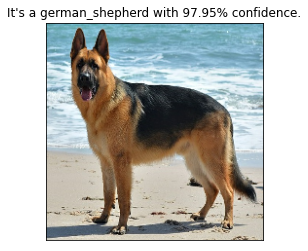

In [273]:
plot_preds(test_imgs,predictions,i=0)